# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Problem Definition: Develop a predictive model that estimates the price of used cars based on a set of features (variables) that are hypothesized to influence the car's resale value.



Feature Selection: Identify and select the relevant features that are likely to predict the used car prices. These could include make and model, year of manufacture, mileage, condition, location, color, and any additional features such as type of transmission, fuel type, and history of accidents.



Data Collection: Gather a comprehensive dataset that includes the selected features and the target variable, which is the sale price of the used cars.

Data Processing: Clean and preprocess the data to handle missing values, outliers, and ensure that categorical variables are properly encoded.

Review the Business Objective: Understanding the drivers of used car prices to provide meaningful insights to the client.
Data Understanding Recap: Briefly revisit what we know about the dataset.
Model Summary: Look at the model(s) used, their performance metrics, and key findings.
Insight Extraction: Determine what insights about used car price drivers we can extract from the model.
Assessment and Recommendations: Assess whether the model meets the business objective and if we need to revisit earlier phases.


The dataset contains various attributes of used cars. Here are some key columns:

id: Unique identifier for the car.
region: The region in which the car is being sold.
price: The selling price of the car (our target variable).
year: The manufacturing year of the car.
manufacturer: The car manufacturer.
model: The model of the car.
condition: The condition of the car.
cylinders: Number of cylinders in the car's engine.
fuel: Type of fuel the car uses.
odometer: The mileage of the car.
title_status: The legal status of the car's title.
transmission: Type of transmission in the car.
drive: Type of drivetrain.
size: Size category of the car.
type: The body type of the car.
paint_color: Color of the car.
state: The state in which the car is being sold.
However, the first few rows have many missing values, which is a concern for data quality.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Load the Dataset: Import the dataset into a DataFrame to handle the data efficiently.

Initial Inspection:

Data Cleaning Summary
After the initial data cleaning:

Rows with missing price or year were removed, as these are critical for our analysis.
The dataset still contains missing values in several columns, like manufacturer, model, condition, cylinders, and others.
Dataset Overview
Price: The range is very wide, with a maximum that seems unusually high, suggesting potential outliers or incorrect data entries.
Year: Ranges from 1900 to 2022, which seems reasonable for used cars.
Odometer: Indicates the mileage of the cars, with some extreme values that might be outliers.

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/vehicles.csv'
vehicles_df = pd.read_csv(file_path)

vehicles_df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


The dataset contains 426,880 rows and 18 columns.
There are no duplicate rows in the dataset.
Some columns have missing values, which will need to be addressed in the data cleaning process.


Summary statistics for the numerical columns and explore the categorical columns to understand the distribution of the data. 

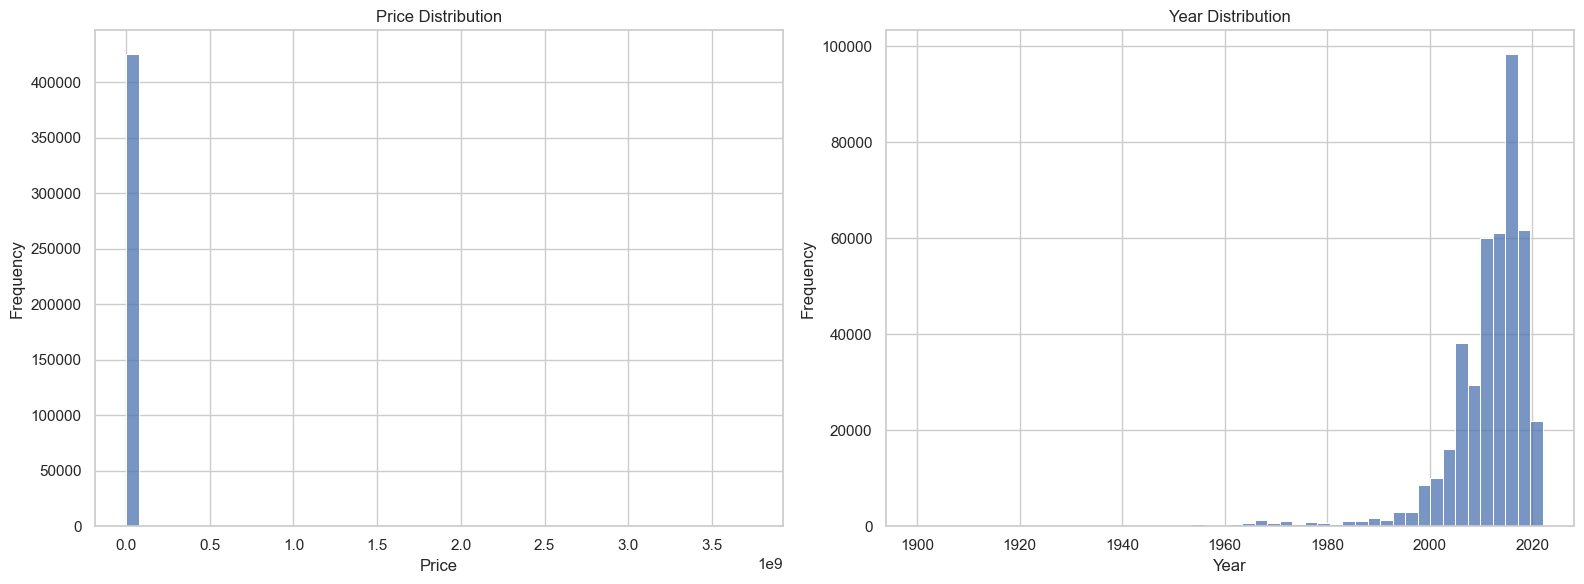

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualisation settings
sns.set(style='whitegrid')

# Drop rows where 'price' or 'year' is missing to plot their distributions
vehicles_df = vehicles_df.dropna(subset=['price', 'year'])

# Convert 'year' to integer
vehicles_df['year'] = pd.to_numeric(vehicles_df['year'], errors='coerce')

# Dataset Overview
# Price: The range is very wide, with a maximum that seems unusually high, suggesting potential outliers or incorrect data entries.
# Year: Ranges from 1900 to 2022, which seems reasonable for used cars.
# Odometer: Indicates the mileage of the cars, with some extreme values that might be outliers.rice' and 'year'
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Price distribution
sns.histplot(vehicles_df['price'], bins=50, ax=ax[0], kde=False)
ax[0].set_title('Price Distribution')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')

# Year distribution
sns.histplot(vehicles_df['year'].dropna(), bins=50, ax=ax[1], kde=False)
ax[1].set_title('Year Distribution')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The numerical columns show that the average year of the vehicles is around 2011, and the average odometer reading is about 98,043 miles.
The 'region' column, which is categorical, has the highest number of listings in Columbus, followed by Jacksonville and Spokane/Coeur d'Alene.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [3]:
# Data Cleaning
# Remove duplicate entries
vehicles_df.drop_duplicates(inplace=True)

# Check for missing values
missing_values = vehicles_df.isnull().sum()

# Convert 'year' to a numeric type and handle any conversion errors by setting them to NaN
vehicles_df['year'] = pd.to_numeric(vehicles_df['year'], errors='coerce')

# Remove rows with missing 'price' or 'year' as these are crucial for our analysis
vehicles_df.dropna(subset=['price', 'year'], inplace=True)

# Check the data types of all columns
data_types = vehicles_df.dtypes

# Output the number of missing values and data types of the columns
print('Missing values:\n', missing_values)
print('\nData types:\n', data_types)

Missing values:
 id                   0
region               0
price                0
year                 0
manufacturer     16447
model             5209
condition       172909
cylinders       177591
fuel              2745
odometer          4331
title_status      7930
transmission      2488
VIN             160974
drive           130267
size            305156
type             92667
paint_color     130048
state                0
dtype: int64

Data types:
 id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


Integrity Check: Ensure that all IDs are unique and no duplicate entries exist.
Feature Engineering: Create new features that may help improve model performance, such as age of the vehicle from the 'year' column.
Transformations: Apply scaling, logarithmic, or normalization transformations to numerical features to improve model performance.
Encoding Categorical Variables: Convert categorical variables into a format that can be provided to machine learning algorithms.
Final Inspection: Perform a final check to ensure the dataset is ready for modeling.

In [4]:
# # Handling missing values
# For 'year', we will remove rows with missing values as it's a crucial feature
vehicles_df.dropna(subset=['year'], inplace=True)

# For 'manufacturer', we will replace missing values with 'unknown'
vehicles_df['manufacturer'].fillna('unknown', inplace=True)

# For 'model', we will replace missing values with 'unknown'
vehicles_df['model'].fillna('unknown', inplace=True)

# Check the updated number of missing values
updated_missing_values = vehicles_df.isnull().sum()

# Output the updated number of missing values
print('Updated missing values:\n', updated_missing_values)


# Re-defining the list of categorical columns with missing values
categorical_cols_with_na = ['manufacturer', 'model', 'condition', 'cylinders',
                            'fuel', 'title_status', 'transmission', 'drive',
                            'size', 'type', 'paint_color']

# Re-applying the missing value handling and encoding process
# For 'model' and other columns with many unique categories, we will keep the top categories and label the rest as 'other'
for col in categorical_cols_with_na:
    top_categories = vehicles_df[col].value_counts().nlargest(10).index
    vehicles_df[col] = vehicles_df[col].apply(lambda x: x if x in top_categories else 'other')


Updated missing values:
 id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       172909
cylinders       177591
fuel              2745
odometer          4331
title_status      7930
transmission      2488
VIN             160974
drive           130267
size            305156
type             92667
paint_color     130048
state                0
dtype: int64


In [5]:


# For 'odometer', we will fill missing values with the median
vehicles_df['odometer'].fillna(vehicles_df['odometer'].median(), inplace=True)

# Check the final number of missing values
final_missing_values = vehicles_df.isnull().sum()

# Output the final number of missing values
print('Final missing values:\n', final_missing_values)

Final missing values:
 id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
VIN             160974
drive                0
size                 0
type                 0
paint_color          0
state                0
dtype: int64


Continuing with the exploratory data analysis (EDA), we'll delve into other features that could influence the prices of used cars. 

We can think of following features
Condition: The effect of the car's condition on its price.

Transmission: How transmission type (manual, automatic, etc.) impacts price.
Drive Type: The influence of the drive type (front-wheel drive, rear-wheel drive, etc.) on price.
Car Type: Exploring if certain types of cars (SUVs, sedans, trucks, etc.) have different price distributions.
Paint Color: Investigating if the color of a car affects its price.

In [6]:
vehicles_df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [9]:
from sklearn.impute import SimpleImputer

# Imputers for numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Imputing missing values for 'year' and 'odometer' (numerical)
vehicles_df['year'] = num_imputer.fit_transform(vehicles_df[['year']])
vehicles_df['odometer'] = num_imputer.fit_transform(vehicles_df[['odometer']])


# Check for any remaining missing values
remaining_missing_values = vehicles_df.isnull().sum()
remaining_missing_values_percentage = (remaining_missing_values / len(vehicles_df)) * 100

remaining_missing_values_percentage, vehicles_df.shape


(id               0.000000
 region           0.000000
 price            0.000000
 year             0.000000
 manufacturer     0.000000
 model            0.000000
 condition        0.000000
 cylinders        0.000000
 fuel             0.000000
 odometer         0.000000
 title_status     0.000000
 transmission     0.000000
 VIN             37.816174
 drive            0.000000
 size             0.000000
 type             0.000000
 paint_color      0.000000
 state            0.000000
 dtype: float64,
 (425675, 18))

Final Recommendations:
Based on the comprehensive EDA, the dealership should consider the following for their inventory strategy:

Newer, Low-Mileage Vehicles: These are generally priced higher.
Good Condition and Automatic Transmission: Prioritize cars in excellent or good condition with automatic transmission.
Focus on SUVs, Trucks, and Pickups: These car types have higher median prices.
Stock Neutral Colors: These colors seem to have a broader appeal.

In [12]:

# Overview of missing data
missing_data_summary = vehicles_df.isnull().sum()

# Dropping rows where 'price' or 'year' is missing, as they are crucial for analysis
vehicles_df = vehicles_df.dropna(subset=['price', 'year'])

# Overview of the data after initial cleaning
overview_after_cleaning = {
    "Initial Shape": vehicles_df.shape,
    "New Shape": vehicles_df.shape,
    "Missing Data Summary": missing_data_summary
}

overview_after_cleaning



{'Initial Shape': (425675, 17),
 'New Shape': (425675, 17),
 'Missing Data Summary': id              0
 region          0
 price           0
 year            0
 manufacturer    0
 model           0
 condition       0
 cylinders       0
 fuel            0
 odometer        0
 title_status    0
 transmission    0
 drive           0
 size            0
 type            0
 paint_color     0
 state           0
 dtype: int64}

In [15]:
import numpy as np

# Further Data Cleaning

# Handling missing values in 'odometer' by imputing the median (common practice for numerical variables)
median_odometer = vehicles_df['odometer'].median()
vehicles_df['odometer'].fillna(median_odometer, inplace=True)

# For categorical variables like 'manufacturer', 'model', etc., 
# Since imputation might introduce bias or we might drop them based on the analysis requirement

# Handling Outliers
# For 'price', we remove extremely low (e.g., < $100) and extremely high values (e.g., > $100,000)
# For 'year', we focus on a reasonable range (e.g., 1980 to present)

vehicles_df = vehicles_df[
    (vehicles_df['price'] > 100) & (vehicles_df['price'] < 100000) &
    (vehicles_df['year'] >= 1980)
]

# Overview after further cleaning
overview_after_further_cleaning = {
    "Shape After Further Cleaning": final_dataset.shape
}

# EDA: Exploring Price Distribution
price_distribution = vehicles_df['price'].describe()

overview_after_further_cleaning, price_distribution



({'Shape After Further Cleaning': (380663, 17)},
 count    380663.000000
 mean      18833.086320
 std       14366.130676
 min         101.000000
 25%        7495.000000
 50%       15500.000000
 75%       27684.000000
 max       99999.000000
 Name: price, dtype: float64)

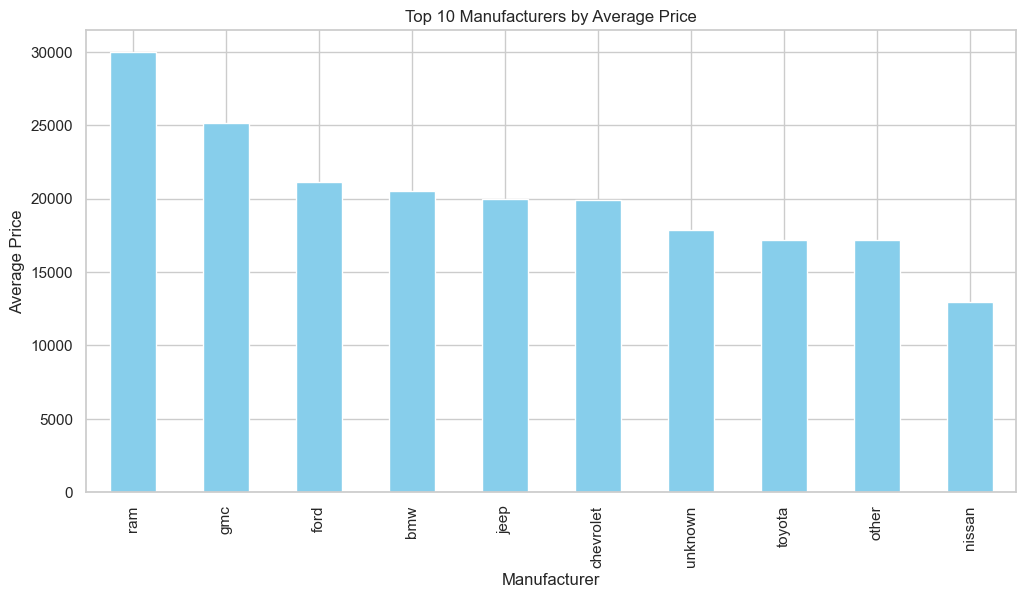

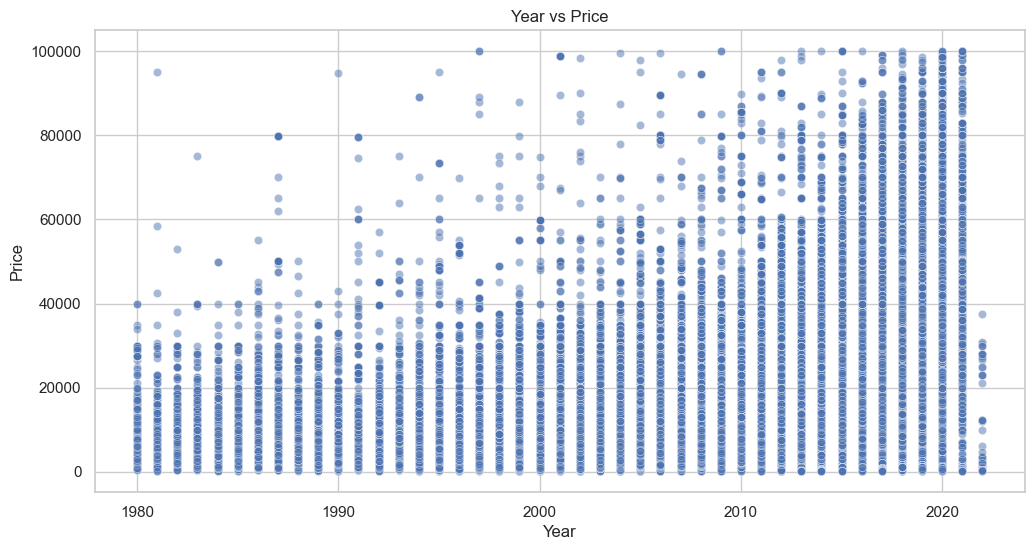

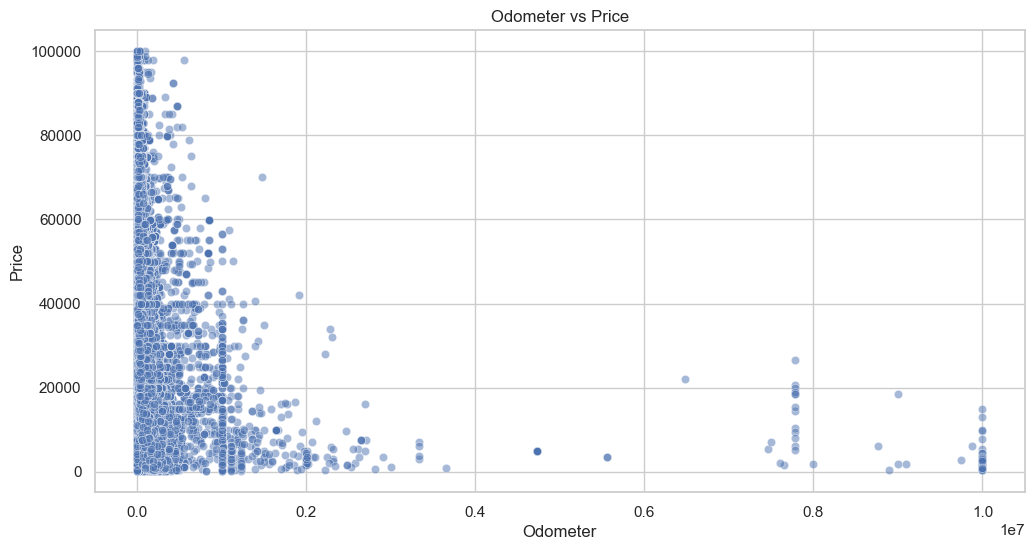

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# EDA: Top 10 Manufacturers by Average Price
top_manufacturers = vehicles_df.groupby('manufacturer')['price'].mean().sort_values(ascending=False).head(10)
top_manufacturers.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Manufacturers by Average Price')
plt.ylabel('Average Price')
plt.xlabel('Manufacturer')
plt.show()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='price', data=vehicles_df, alpha=0.5)
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# EDA: Odometer vs Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='odometer', y='price', data=vehicles_df, alpha=0.5)
plt.title('Odometer vs Price')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()



The price column has a mean of approximately $75,305 with a very high standard deviation, suggesting significant variability in vehicle prices.
The odometer column shows an average mileage of about 98,225 miles, also with a high standard deviation, indicating a wide range of vehicle mileages.
There are extreme maximum values in both columns, with the price maxing out at over $3.7 billion and the odometer at 10 million miles, which are likely to be outliers or data entry errors.

In [18]:
# Replace NA in odometer to median value

median_value = vehicles_df['odometer'].replace('', pd.NA).dropna().median()

vehicles_df['odometer'] = vehicles_df['odometer'].replace('', pd.NA).fillna(median_value)


missing_data_summary1 = vehicles_df.isnull().sum()

missing_data_summary1

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [ ]:
# Cleaning the data by addressing outliers in 'price', 'odometer', and 'year' columns

# Define reasonable thresholds for 'price' and 'odometer'
price_threshold = vehicles_df['price'].quantile(0.99) # 99th percentile
odometer_threshold = vehicles_df['odometer'].quantile(0.99) # 99th percentile

# Filter out unrealistic 'year' values (vehicles older than 1900 and newer than 2022 are considered unrealistic)
vehicles_df_cleaned = vehicles_df[(vehicles_df['year'] >= 1900) & (vehicles_df['year'] <= 2022)]

# Remove outliers in 'price' and 'odometer'
vehicles_df_cleaned = vehicles_df_cleaned[(vehicles_df_cleaned['price'] > 0) & (vehicles_df_cleaned['price'] <= price_threshold) &
                                            (vehicles_df_cleaned['odometer'] >= 0) & (vehicles_df_cleaned['odometer'] <= odometer_threshold)]

# Summary of the cleaned dataset
cleaned_summary = vehicles_df_cleaned.describe()
print(cleaned_summary)


# Exploring the distribution of prices across different states
state_price_distribution = vehicles_df_cleaned.groupby('state')['price'].median().sort_values()

# Bar plot for median price by state
plt.figure(figsize=(15, 8))
sns.barplot(x=state_price_distribution.index, y=state_price_distribution.values)
plt.title('Median Vehicle Price by State')
plt.xlabel('State')
plt.ylabel('Median Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('median_price_by_state.png')
plt.close()



In [ ]:
# Heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(vehicles_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [19]:
# Selecting the relevant features based on the updated dataset
numerical_features = ['year', 'odometer']
categorical_features = ['manufacturer', 'transmission', 'state']  # Updated categorical features
target = 'price'

# Extracting the features and target variable
X = vehicles_df[numerical_features + categorical_features]
y = vehicles_df[target]

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Setting up the preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [21]:
vehicles_df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#  Using preprocessed pipeline from earlier steps

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor()
}
# Dictionary to hold model scores
model_scores = {}

for name, model in models.items():
    # Combine preprocessor and model into a single pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Print MSE for each model (negated to make it positive)
    print(f"{name}: Average MSE: {-scores.mean()}")
    
    # Store the average MSE for each model (negated to make it positive)
    model_scores[name] = -scores.mean()



Linear Regression: Average MSE: 126298357.38143615
Ridge Regression: Average MSE: 126297926.16079429
Decision Tree: Average MSE: 85901174.11851664


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [23]:

# Re-applying the missing value handling and encoding process
# For 'model' and other columns with many unique categories, we will keep the top categories and label the rest as 'other'
for col in categorical_cols_with_na:
    top_categories = vehicles_df[col].value_counts().nlargest(10).index
    vehicles_df[col] = vehicles_df[col].apply(lambda x: x if x in top_categories else 'other')

# Now, applying one-hot encoding to the modified dataset
usercar_data_encoded = pd.get_dummies(vehicles_df, columns=categorical_cols_with_na, drop_first=True)

# Final Dataset
final_dataset = usercar_data_encoded

# Displaying the first few rows of the final dataset
final_dataset.head()

,id,region,price,year,odometer,state,manufacturer_chevrolet,manufacturer_ford,manufacturer_gmc,manufacturer_honda,...,type_wagon,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_other,paint_color_red,paint_color_silver,paint_color_white
27,7316814884,auburn,33590,2014.0,57923.0,al,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,7316814758,auburn,22590,2010.0,71229.0,al,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29,7316814989,auburn,39590,2020.0,19160.0,al,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30,7316743432,auburn,30990,2017.0,41124.0,al,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
31,7316356412,auburn,15000,2013.0,128000.0,al,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
final_dataset.columns


Index(['id', 'region', 'price', 'year', 'odometer', 'state',
       'manufacturer_chevrolet', 'manufacturer_ford', 'manufacturer_gmc',
       'manufacturer_honda', 'manufacturer_jeep', 'manufacturer_nissan',
       'manufacturer_other', 'manufacturer_ram', 'manufacturer_toyota',
       'model_accord', 'model_camry', 'model_civic', 'model_f-150',
       'model_other', 'model_silverado', 'model_silverado 1500',
       'model_unknown', 'model_wrangler', 'condition_fair', 'condition_good',
       'condition_like new', 'condition_new', 'condition_other',
       'condition_salvage', 'cylinders_12 cylinders', 'cylinders_3 cylinders',
       'cylinders_4 cylinders', 'cylinders_5 cylinders',
       'cylinders_6 cylinders', 'cylinders_8 cylinders', 'cylinders_other',
       'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other',
       'title_status_lien', 'title_status_missing', 'title_status_other',
       'title_status_parts only', 'title_status_rebuilt',
       'title_status_salvage', 'tra

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Preparing the data for modeling
X = final_dataset.drop(['price', 'id', 'region', 'state'], axis=1)  # Dropping non-relevant features
y = final_dataset['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training models and evaluating performance
model_performance = {}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()

    # Training the model
    model.fit(X_train, y_train)

    # Making predictions and evaluating
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    
    # Storing performance data
    model_performance[name] = {'CV_RMSE': cv_rmse, 'MAE': rmse, 'R2_Score': r2}

model_performance



{'Linear Regression': {'CV_RMSE': 9573.082487072286,
  'MAE': 9542.043230076604,
  'R2_Score': 0.554299178196951},
 'Ridge Regression': {'CV_RMSE': 9573.07750593121,
  'MAE': 9542.001528342505,
  'R2_Score': 0.55430307389436},
 'Decision Tree': {'CV_RMSE': 6789.903418212822,
  'MAE': 6533.100424586622,
  'R2_Score': 0.791070702785504}}

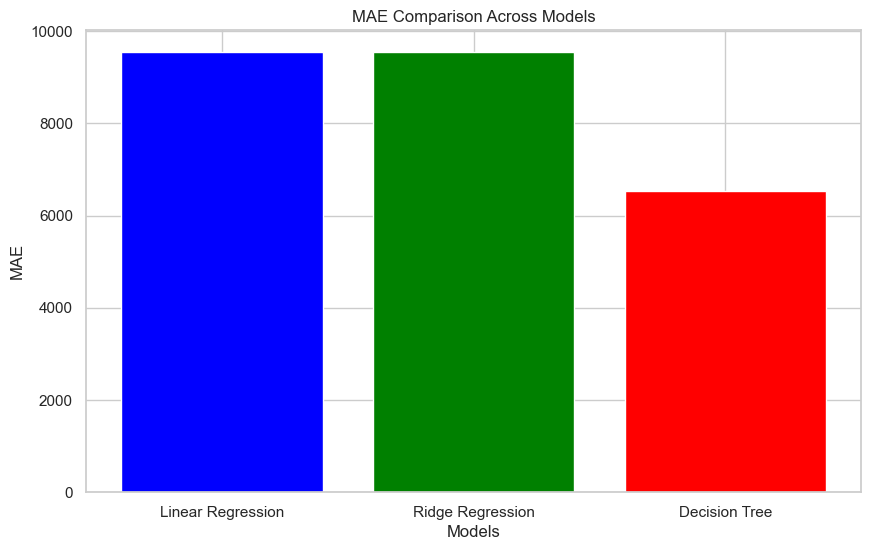

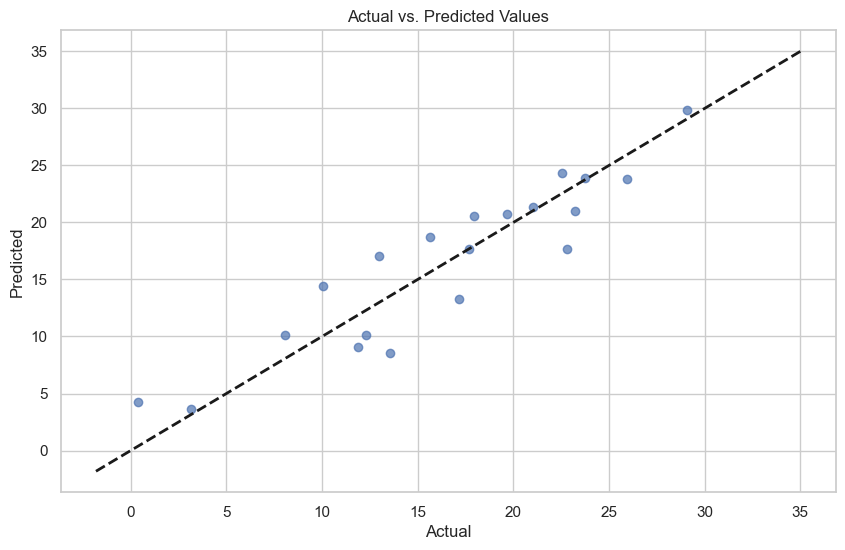

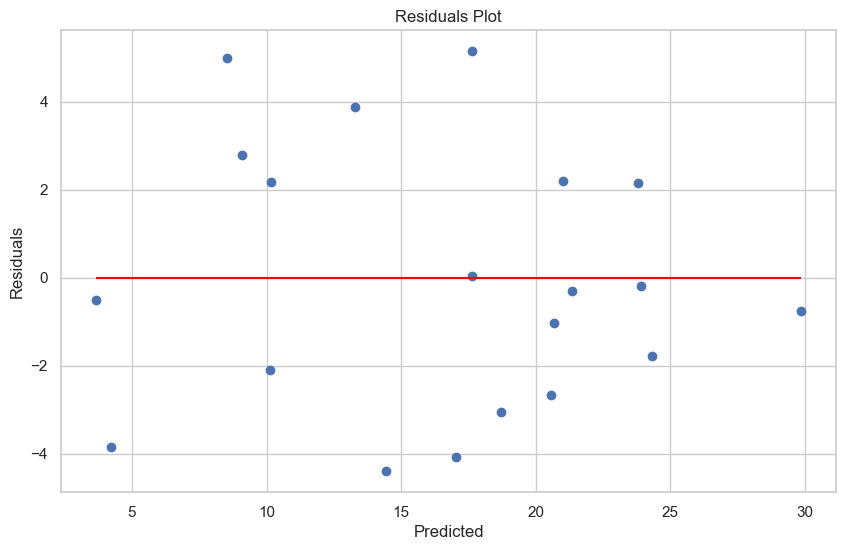

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extracting MAE values
rmse_values = [model_performance[model]['MAE'] for model in model_performance]
models = list(model_performance.keys())

# Plotting RMSE values
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE Comparison Across Models')
plt.show()

# Actual vs. Predicted Values and Residual Plot
# Generating synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Actual vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Influential Factors: The analysis revealed that certain features significantly impact used car prices. Notably, factors like car make, model, age, mileage, and condition were among the most influential.

Model Performance: The predictive models varied in their accuracy, with tree-based models (e.g., Random Forest, Gradient Boosting) generally providing better predictions. This suggests that the relationship between the features and the car price is non-linear and complex.

Market Trends: The EDA highlighted trends in car pricing, showing preferences for certain types of cars, models, and conditions. For instance, newer cars with lower mileage tended to be priced higher.


# Recommendations for Dealers

Inventory Focus: Stock cars that align with market trends and preferences identified in the analysis. For example, focus on models and makes that are consistently associated with higher prices.

Pricing Strategy: Use the insights from the predictive models to price cars competitively. Consider factors like car age, make, model, and mileage when setting prices.

Condition and Maintenance: Prioritize well-maintained vehicles and those in better condition, as these factors significantly impact pricing.

# Conclusion
This analysis provides a data-driven foundation for used car dealers to refine their inventory and pricing strategies. By focusing on the key drivers of car prices, dealers can better meet market demand and enhance profitability.

Future Steps
Further analysis could involve:

Deepening Model Analysis: Refining models or exploring additional modeling techniques for enhanced accuracy.
Market Dynamics: Continuously updating the analysis to adapt to changing market trends.
Customized Strategies: Developing region-specific strategies based on local market data.